In [1]:
import librosa
from pydub import AudioSegment
from pydub.playback import play
import tempfile
import shutil
import urllib.request
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [3]:
#url = 'https://github.com/Jakobovski/free-spoken-digit-dataset/blob/master/recordings/0_jackson_0.wav'
url = 'http://www.ne.jp/asahi/music/myuu/wave/cat1.wav'
with urllib.request.urlopen(url) as response:
   #data = response.read()
   with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        shutil.copyfileobj(response, tmp_file)
#filename = 'temp.wav'
#urllib.request.urlretrieve(url, filename)

In [4]:
sound = AudioSegment.from_file(tmp_file.name, "wav")
play(sound)

In [5]:
x, sr = librosa.load(tmp_file.name)
mel = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)
mel_power = librosa.amplitude_to_db(mel, ref=np.max)
mfccs = librosa.feature.mfcc(x, sr=sr)

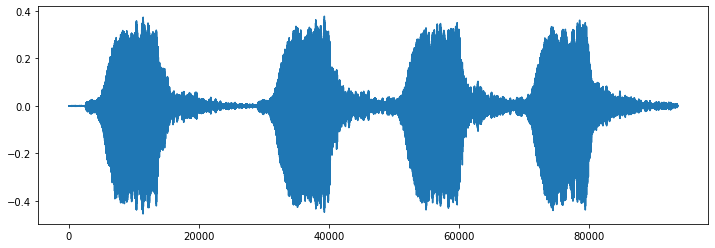

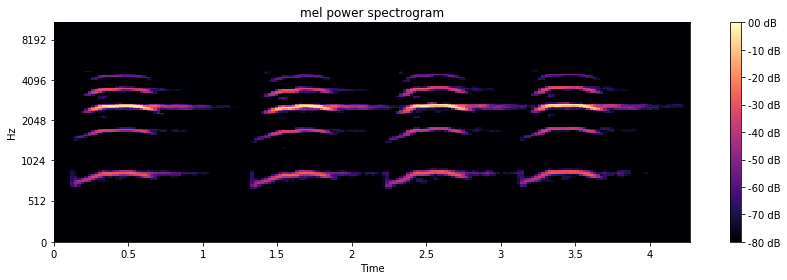

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(x)
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_power, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
plt.show()

In [7]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [8]:
#plt.plot(x)
#plt.show()

#plt.plot(add_white_noise(x))
#plt.show()

#plt.plot(shift_sound(x))
#plt.show()

#plt.plot(stretch_sound(x))
#plt.show()

In [9]:
import pyaudio
import sys
import time
import wave

chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 3

audio = pyaudio.PyAudio()

stream = audio.open(
    format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = chunk
)

print('recording...')

frames = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk)
    frames.append(data)

stream.close()
audio.terminate()

data = b''.join(frames)

print ("finished recording")

record_file = 'temp.wav'
waveFile = wave.open(record_file, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(data)
waveFile.close()

recording...
finished recording


In [10]:
sound = AudioSegment.from_file(record_file, "wav")
play(sound)

In [11]:
x, sr = librosa.load(record_file)
mel = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)
mel_power = librosa.amplitude_to_db(mel, ref=np.max)
mfccs = librosa.feature.mfcc(x, sr=sr)

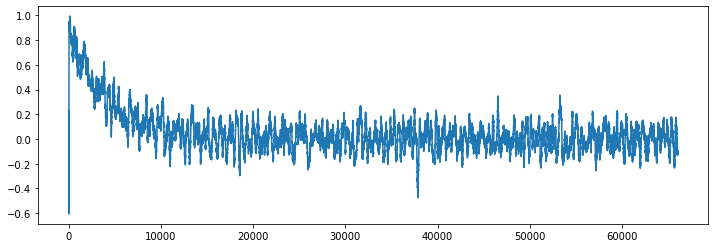

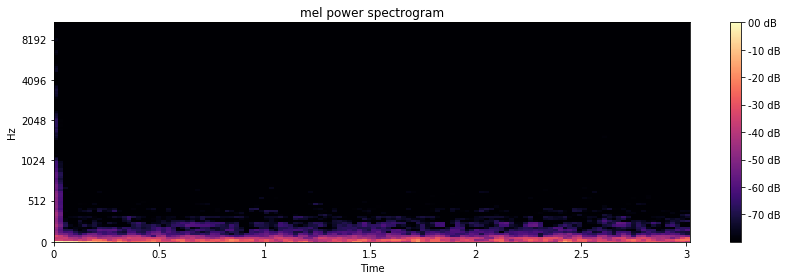

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(x)
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_power, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
plt.show()